# Exploratory Data Analysis on Apple's Appstore Data 
![](https://i.imgur.com/2bpcKS8.jpg)
The [App Store](https://en.wikipedia.org/wiki/App_Store_(iOS/iPadOS)) is an app store platform, developed and maintained by Apple Inc., for mobile apps on its iOS and iPadOS operating systems. The store allows users to browse and download approved apps developed within Apple's iOS Software Development Kit.

The project is about process of exploring, investigating and gathering insights from data using statistical measures and visualizations. Various techniques of exploratory and predictive analysis can help businesses structure and recalibrate their pricing, marketing and inventory strategies in real-time. The libraries used in this project are Pandas, Seaborn, Plotly and Matplotlib.

Here's the outline of the project:

1. Download the data
2. Data preperation and cleaning
3. Data Analysis and visualizing.
4. Questioning & Answering
5. Summary
6. Future work
6. References

## -> Downloading the data.

I found [Apple Appstore Dataset](https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps) on kaggle containing 1.2+ million app data from 2008 - 2021.

The data is categorized into 21 columns:-

1. `App_Id`: Each application that is listed has a unique id.
2. `App_Name`: Contains application name.
3. `Appstore_URL`: Link to visit app in appstore.
4. `Primary_Genre`: Contains application genre(category).
5. `Content_Rating`: Contains age limit for each app.
6. `Size_Bytes`: Application size in bytes.
7. `Required_IOS_Version`: Contains required IOS version to download the app.
8. `Released`: When was the app released (Year, month, date, time).
9. `Updated`: Latest update of the app (Year, month, date, time).
10. `Version`: Version of the app.
11. `Price`: Price of the app.
12. `Currency`: What is the currency of the price.
13. `Free`: Contains info about the app is free or paid. 
14. `DeveloperId`: Each developer that is listed has a unique id.
15. `Developer`: Contains developer name.
16. `Developer_Url`: Contains link to the developer site.
17. `Developer_Website`: Contains link to the developer site.
18. `Average_User_Rating`: Average user rating of the app.
19. `Reviews`: Total number of of reviews.
20. `Current_Version_Score`: Current version rating.
21. `Current_Version_Reviews`: Current version reviews.

Let's start by downloading the dataset

In [1]:
# Opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.
!pip install opendatasets --upgrade --quiet 

In [2]:
import opendatasets
opendatasets.download('https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: pratulperla
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:02<00:00, 58.9MB/s]


In [3]:
data_filename= './apple-appstore-apps/appleAppData.csv' 

## -> Data preperation and Cleaning.

The quality of data is the most crucial element of any business intelligence strategy. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.


In [4]:
#Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
import pandas as pd

Creating a copy of the dataset just in case.

In [5]:
df_backedup= pd.read_csv(data_filename)
df=df_backedup.copy()

This how the data looks like

In [6]:
df.sample(3)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
243083,com.lospinoshardware.builder,Los Pinos App,https://apps.apple.com/us/app/los-pinos-app/id...,Business,4+,67632128.0,10.0,2021-02-02T08:00:00Z,2021-02-20T17:54:59Z,1.2.7,...,USD,True,1548233340,Los Pinos Hardware Co.,https://apps.apple.com/us/developer/los-pinos-...,NaN,0.0,0,0.0,0
40676,com.isc.kduefame,KDU CRM,https://apps.apple.com/us/app/kdu-crm/id144254...,Business,4+,8479744.0,11.0,2019-02-05T17:17:27Z,2020-09-01T20:48:23Z,4.1,...,USD,True,1442546797,Pravin Angane,https://apps.apple.com/us/developer/pravin-ang...,http://isconline.co.in,0.0,0,0.0,0
1073818,com.bitcot.app.emokeys,Selfiemoji,https://apps.apple.com/us/app/selfiemoji/id945...,Utilities,4+,4187136.0,8.0,2015-01-28T11:47:00Z,2015-07-28T12:55:42Z,2.0.0,...,USD,True,919972367,Bitcot,https://apps.apple.com/us/developer/bitcot/id9...,NaN,0.0,0,0.0,0


In [7]:
# Shape of the Dataset
# Rows :  1230376 ; Columns : 21
df.shape

(1230376, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

The data contains 4 float, 1 bool, 3 int and 13 objects i.e string formatted columns.

Checking for null/nan values.

In [9]:
df.isna().sum()

App_Id                          0
App_Name                        1
AppStore_Url                    0
Primary_Genre                   0
Content_Rating                  0
Size_Bytes                    224
Required_IOS_Version            0
Released                        3
Updated                         0
Version                         0
Price                         490
Currency                        0
Free                            0
DeveloperId                     0
Developer                       0
Developer_Url                1109
Developer_Website          643988
Average_User_Rating             0
Reviews                         0
Current_Version_Score           0
Current_Version_Reviews         0
dtype: int64

Droping the columns which are not used in this analysis

In [10]:
removing_col = ['App_Id', 'AppStore_Url','Version','DeveloperId','Current_Version_Score',
                'Current_Version_Reviews','Developer_Url','Developer_Website']
df.drop(removing_col,axis=1,inplace=True)

Converting from the column app size in 'Bytes' into 'MegaBytes' and created new column and Rounding multiple decimal values into two.

In [11]:
df['Size_MB']= round(df.Size_Bytes*0.000001, 2)
df['Average_User_Rating']= round(df.Average_User_Rating, 2)

Now the 'Size_Bytes' column is no longer needed

In [12]:
df.drop('Size_Bytes',axis=1,inplace=True)

Converting datatype of 'Released' and 'Updated' column to DateTime. Previously it was an object

In [13]:
df['Released']= pd.to_datetime(df['Released'])
df['Updated']= pd.to_datetime(df['Updated'])

Seems like the column as sum null values in it

In [14]:
df[df['Released'].isna()]

,App_Name,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Price,Currency,Free,Developer,Average_User_Rating,Reviews,Size_MB
264853,Kingdom Rush Frontiers TD+,Games,12+,13.0,NaT,2021-11-12 08:00:00+00:00,NaN,USD,False,Ironhide Irl,0.0,0,NaN
836858,Transformers: Tactical Arena,Games,9+,13.5.0,NaT,2021-11-05 07:00:00+00:00,NaN,USD,False,"RED GAMES CO, LLC",0.0,0,NaN
919513,Crayola Create and Play+,Games,4+,13,NaT,2021-10-29 07:00:00+00:00,NaN,USD,False,"RED GAMES CO, LLC",0.0,0,NaN


Dropping the null rows because there are no reviews(users) for the apps which I am considering as invalid apps

In [15]:
df.drop([264853,836858,919513],inplace=True)

In the data there are some paid apps which the price is NaN/null

In [16]:
df.loc[((df.Free==False) & (df['Price'].isnull())), 'Price'] = 0.0 # Converting NaN values to 0
df.loc[((df.Free==False) & (df['Price']==0.0)), 'Free'] = True # Converting fake Paid apps into Free apps
df[(df.Free==False) & (df['Price']==0.0)]

,App_Name,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Price,Currency,Free,Developer,Average_User_Rating,Reviews,Size_MB


In [17]:
# One App name has NaN value
df[df['App_Name'].isna()]

,App_Name,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Price,Currency,Free,Developer,Average_User_Rating,Reviews,Size_MB
964888,NaN,News,4+,9.0,2011-08-08 11:45:30+00:00,2020-12-21 14:08:02+00:00,0.0,USD,True,Promedia,5.0,1,19.53


In [18]:
df.at[964888,'App_Name']= 'Unkonown App' # Named that null value to Unknown app

There are 221 null values in size column

In [19]:
df[df['Size_MB'].isnull()].shape

(221, 13)

Replacing the null values with randomn value size of 50.0 mb.

In [20]:
df.loc[df['Size_MB'].isnull(), 'Size_MB'] = 50.0

This data was released in the month of Oct 2021, possibly there might be false data that in the year 2022, So dropping the data of app releases in the year 2022.

In [21]:
df.drop(df[df['Released'].dt.year==2022].index, inplace=True)

Cleaned and processed data

In [22]:
print("Shape :", df.shape,"\n")
print("\n Duplicate values :", df.duplicated().sum(),"\n")
print("Missing Data :\n", df.isna().sum())

Shape : (1230315, 13) 


 Duplicate values : 0 

Missing Data :
 App_Name                0
Primary_Genre           0
Content_Rating          0
Required_IOS_Version    0
Released                0
Updated                 0
Price                   0
Currency                0
Free                    0
Developer               0
Average_User_Rating     0
Reviews                 0
Size_MB                 0
dtype: int64


## -> Univariate Analysis and Visualization.

Analysis is done to understand the data and get a overview of the situation we get into. Visualizing is the most effective way to understand anything it empowers us to communicate stories more effectively.

Installing appropriate packages for visualizing data

In [23]:
#!pip uninstall matplotlib
#!pip install matplotlib --upgrade --quiet
!pip install seaborn matplotlib==3.2.2 --quiet
!pip install plotly altair --upgrade --quiet

     |████████████████████████████████| 15.2 MB 15.8 MB/s 


Importing Appropriate Libraries

In [24]:
# For creating interactive visualizations
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
# For creating static visualizations in Python
import matplotlib.pyplot as plt
# A high-level interface for drawing informative statistical graphics.
import seaborn as sns
# Numerical computing library
import numpy as np
#  It turns on “inline plotting”, where plot graphics will appear in your notebook
%matplotlib inline

Columns in the cleaned dataset

In [25]:
df.columns

Index(['App_Name', 'Primary_Genre', 'Content_Rating', 'Required_IOS_Version',
       'Released', 'Updated', 'Price', 'Currency', 'Free', 'Developer',
       'Average_User_Rating', 'Reviews', 'Size_MB'],
      dtype='object')

There are 13 columns

In [26]:
df.describe()

,Price,Average_User_Rating,Reviews,Size_MB
count,1.230315e+06,1.230315e+06,1.230315e+06,1.230315e+06
mean,5.039506e-01,1.788491e+00,8.259887e+02,7.509612e+01
std,6.868483e+00,2.154146e+00,5.016176e+04,2.318429e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-02
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.042000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,4.334000e+01
75%,0.000000e+00,4.330000e+00,3.000000e+00,8.364000e+01
max,9.999900e+02,5.000000e+00,2.268533e+07,7.677945e+04


Price: Min= 0 Max= 999.99

Size: Min= 0.3mb Max= 7.6gb

### Content Rating 

This column contains age limit for each app.

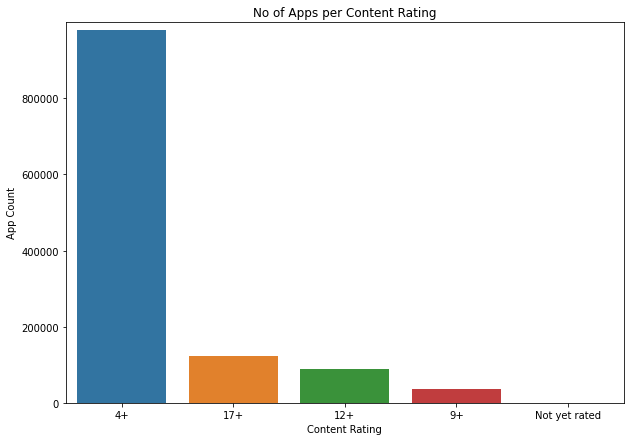

In [27]:
c_r= df.Content_Rating.value_counts().reset_index()
c_r.columns=['Content Rating', 'App Count']

fig,ax= plt.subplots(figsize=(10,7))
plt.title("No of Apps per Content Rating")
sns.barplot(x = c_r['Content Rating'],y = c_r['App Count'], data=c_r)
ax.set_ylim(0, 999999);

> Apps rated 4+ contain no objectionable material.

> Apps rated 9+ may contain instances of content that may not be suitable for children under the age of 9.

> Apps rated 12+ may contain instances of content that may not be suitable for children under the age of 12. 

> Apps rated 17+ may contain instances of content that may not be suitable for minors under the age of 17.

Large amount of the apps are present in 4+ content rating

### Repeating app names
There several apps that have same names

In [28]:
df.App_Name.value_counts()

Vanguard                        6
Bloom                           5
Linker                          5
Flow                            4
Settle                          4
                               ..
Popstar Crush消星星爱上消消乐           1
Popstar Bubbles - Brain Game    1
Popstar Blast                   1
PopStar 3                       1
Sổ Điểm Thông Minh              1
Name: App_Name, Length: 1223450, dtype: int64

Seems like a valid data because the app has different vendors and also from different category

In [29]:
#df[df.App_Name=='Linker']
df[df.App_Name=='Vanguard']

,App_Name,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Price,Currency,Free,Developer,Average_User_Rating,Reviews,Size_MB
478488,Vanguard,Finance,4+,10.0,2009-10-24 19:14:54+00:00,2021-08-26 19:55:20+00:00,0.0,USD,True,"The Vanguard Group, Inc.",4.74,167472,160.80
624553,Vanguard,Games,4+,10.0,2021-08-27 07:00:00+00:00,2021-08-27 12:16:53+00:00,0.0,USD,True,omar naser,3.00,2,191.24
871735,Vanguard,Lifestyle,4+,9.0,2020-03-25 07:00:00+00:00,2021-10-05 23:12:01+00:00,0.0,USD,True,Vanguard Home Empreendimentos Imobiliarios LTDA,0.00,0,87.82
1024185,Vanguard,Productivity,17+,13.0,2021-06-11 07:00:00+00:00,2021-09-05 08:02:33+00:00,0.0,USD,True,3k CO-LIVING $ ACCOMODATION,0.00,0,35.23
1066082,Vanguard,Reference,4+,12.0,2018-11-13 01:31:37+00:00,2021-03-24 12:38:41+00:00,0.0,USD,True,TONANDEL PTY LTD,0.00,0,24.20
1094792,Vanguard,Shopping,4+,13.0,2014-09-28 16:38:41+00:00,2021-07-26 09:36:18+00:00,0.0,USD,True,Just Brands B.V.,5.00,1,68.75


### Top Category

Calculating by total number of apps in each genre

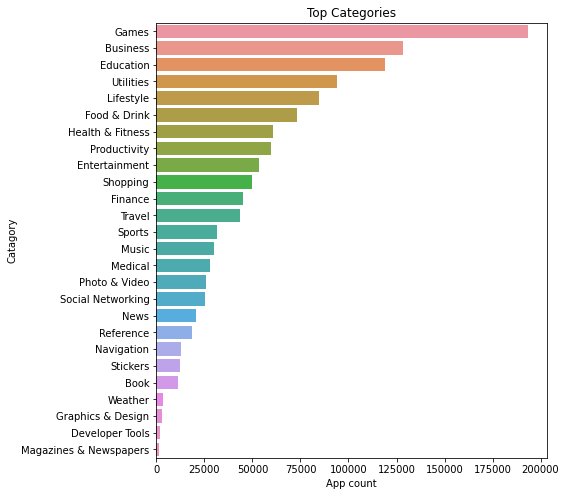

In [30]:
gpdev=df.groupby(['Primary_Genre'])['App_Name'].count().reset_index().sort_values(['App_Name'], ascending=False)
gpdev.columns=['Catagory', 'App count']
# Visualizing 
fig, ax = plt.subplots(figsize=(7,8))
plt.title("Top Categories")
sns.barplot(y = gpdev['Catagory'],x = gpdev['App count'], data=gpdev);

> Games topped from list of categories.

> Business & Education application are in a race.

### High Priced Apps
Visualizing top 30 high priced apps

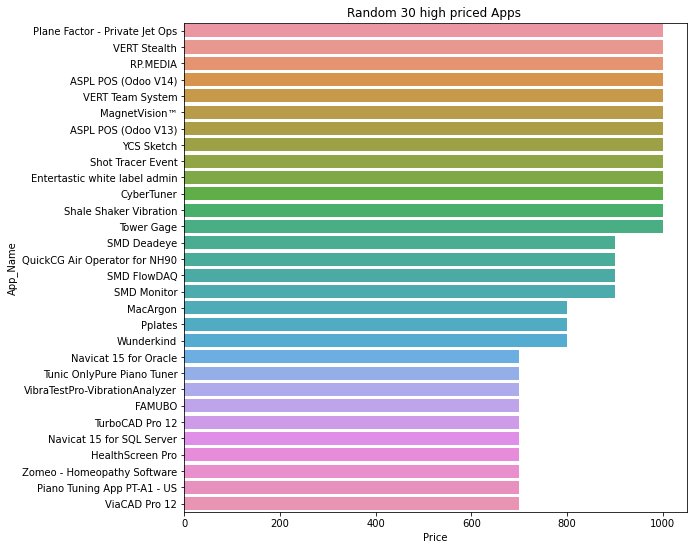

In [31]:
high_price=df.sort_values(by='Price',ascending=False)[:30]
plt.subplots(figsize=(9,9))
plt.title("Random 30 high priced Apps ")
sns.barplot(y = high_price['App_Name'],x = high_price['Price'], data=high_price);

Apps that costs fortune ;). The highest price in appstore is 999.99 USD

### Ratio of the paid apps and free apps
Total no of free apps : Total no of Paid apps

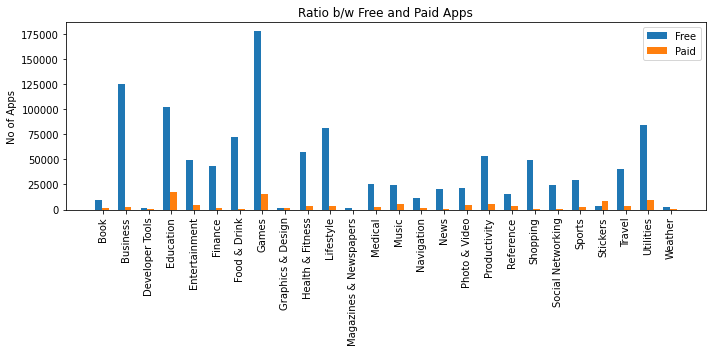

In [32]:
free_cat= df[df['Free']==True].groupby(['Primary_Genre'])['App_Name'].count().reset_index()
paid_cat= df[df['Free']==False].groupby(['Primary_Genre'])['App_Name'].count().reset_index()
free_cat.columns=['Catagory', 'Free']
paid_cat.columns=['Catagory', 'Paid']
concat_free_paid= pd.merge(free_cat, paid_cat, how='inner', on='Catagory')
# Visualizing
labels = concat_free_paid.Catagory
a = concat_free_paid.Free
b = concat_free_paid.Paid

x = np.arange(len(labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, a, width, label='Free')
rects2 = ax.bar(x + width/2, b, width, label='Paid')

ax.set_ylabel('No of Apps')
ax.set_title('Ratio b/w Free and Paid Apps')
ax.set_xticks(x + width / 5)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

> Seems like there way mare less paid apps in all categories.

> Education and Games have almost same amount of paid apps.


### Top Developers
According to the number of apps they've published.

In [33]:
top_dev_appc= df.groupby([df.Developer])['App_Name'].count().reset_index().sort_values(by='App_Name', ascending=False)
top_dev_appc.columns= ['Developer','App Count']
fig = px.pie(top_dev_appc[:30], 
             values='App Count', 
             names='Developer', 
             title='Top Developers', hole=.3)
fig.update_layout(width=840)
fig.show()

ChowNow has published almost 4 thousand apps in appstore. Touch2Success, Alexander Velimirovic, Mindbody, Phorest, Offline map trip guide ltd these developers have published more than a thousand applications.


## -> Questioning & Answering
We've already gained some insights about the Appstore app data by exploring individual columns of the dataset. 

Let's ask some specific questions and try to answer them using data frame operations and visualizations.

1. Which developers are most popular?
2. Which app has popularity dominance from Top 20 developers?
3. What is the impact on users due to size of the app?
4. What is the number of app releases and users over the years?
5. How many apps will work on various IOS versions?
6. What is percent of Free and Paid Games and What are the top 10 games that most users use?
7. What is the growth of gamers over the years. (2008 - 2021)
8. Which developer has the highest earnings from paid apps?

### Q1. Which developers are most popular? 


  

In [34]:
top_pop_dev_r = df.groupby(['Developer'])['Reviews'].sum().reset_index().sort_values(by=['Reviews'],ascending=False)
top_dev_appc= df.groupby(['Developer'])['App_Name'].count().reset_index().sort_values(by='App_Name', ascending=False)
top_pop_dev= pd.merge(top_pop_dev_r, top_dev_appc, how='inner', on='Developer')
top_pop_dev.columns=['Developer','Popularity', 'App_Count']

By calculating 1 Review = 1 User

In [93]:
fig1= px.funnel(top_pop_dev[:20],
                x='Popularity',
                y='Developer',
                text='App_Count',
                color= 'Developer',
                #labels='Developer',
                template='ggplot2',
                title= 'Top 20 Popular Developers')
fig1.update_layout(title_x=0.5, showlegend=False, width= 700)
fig1.show()


> Google has 42 million users with 85 apps.

> Instagram with 6 apps has 21 million, that's half of google's total users.

> Spotify and Voodoo has almost no of users. But voodoo has 189 apps where as spotify has only 7.

### Q2.Which app has popularity dominance from any Top 20?

In [94]:
google_df= df[df['Developer']=='Google LLC'].sort_values(by='Reviews',ascending=False)
disney_df= df[df['Developer']=='Disney'].sort_values(by='Reviews',ascending=False)
spotify_df= df[df['Developer']=='Spotify Ltd.'].sort_values(by='Reviews',ascending=False)
voodoo_df= df[df['Developer']=='Voodoo'].sort_values(by='Reviews',ascending=False)
amazon_df= df[df['Developer']=='AMZN Mobile LLC'].sort_values(by='Reviews',ascending=False)
microsoft_df= df[df['Developer']=='Microsoft Corporation'].sort_values(by='Reviews',ascending=False)
lion_df= df[df['Developer']=='Lion Studios'].sort_values(by='Reviews',ascending=False)

In [96]:
from plotly import tools

trace1 = go.Bar(
    x=google_df['App_Name'][:10],
    y=google_df['Reviews'],
    name='Google LLC'
)
trace2 = go.Bar(
    x=disney_df['App_Name'][:10],
    y=disney_df['Reviews'],
    name='Disney'
)
trace3 = go.Bar(
    x=microsoft_df['App_Name'][:10],
    y=microsoft_df['Reviews'],
    name='Microsoft'
)
trace4 = go.Bar(
    x=voodoo_df['App_Name'][:10],
    y=voodoo_df['Reviews'],
    name='Voodoo'
)
trace5 = go.Bar(
    x=amazon_df['App_Name'][:10],
    y=amazon_df['Reviews'],
    name='Amazon Mobile LLC'
)
trace6 = go.Bar(
    x=lion_df['App_Name'][:10],
    y=lion_df['Reviews'],
    name='Lion Studios'
)

fig2 = tools.make_subplots(rows=1, cols=6)


In [97]:
fig2.append_trace(trace1, 1,1)
fig2.append_trace(trace2, 1,2)
fig2.append_trace(trace3, 1,3)
fig2.append_trace(trace4, 1,4)
fig2.append_trace(trace5, 1,5)
fig2.append_trace(trace6, 1,6)

fig2.layout.update(height=500, width=1500)
fig2.update_layout(title='Most Popular Apps')
fig2.update_xaxes(tickangle=47)
fig2.show()

> Youtube is the dominant app from Google LLC with 20+ million users, that's the total users of below top 9 apps.

> My Disney Experience and ESPN have a large amount of users.

> Microsoft Teams is the dominant app from Microsoft.

> From Voodoo a games developer Hele.io has more popularity(users).

> Amazon has AMZN shopping app which is the dominant with almost 4.5 million users

> Lion Studio has Match 3D app with 800+ thousand users.

### Q3.What is the impact on users due to size of the app?

In [44]:
#### DIVIDING into Large / Medium / Small dfs

large= df[(df.Size_MB>=500)].groupby(['Primary_Genre'])['Reviews'].sum().reset_index()
medium= df[(df.Size_MB>=200)&(df.Size_MB<=500)].groupby(['Primary_Genre'])['Reviews'].sum().reset_index()
small= df[(df.Size_MB<=200)].groupby(['Primary_Genre'])['Reviews'].sum().reset_index()

#### MERGING Large / Medium / Small dfs into one

l_and_m= pd.merge(large, medium, how='inner', on='Primary_Genre')
users_impact_df= pd.merge(l_and_m, small, how='inner', on='Primary_Genre')
users_impact_df.columns=['Genre','Large','Medium','Small']

#### ADDING columns Percetage of Large / Medium / Small app users

users_impact_df['Total_users'] = users_impact_df['Medium']+users_impact_df['Small']+users_impact_df['Large']
users_impact_df['large_percentage']= round((users_impact_df['Large']/users_impact_df['Total_users'])*100,2)
users_impact_df['medium_percentage']= round((users_impact_df['Medium']/users_impact_df['Total_users'])*100,2)                                      
users_impact_df['small_percentage']= round((users_impact_df['Small']/users_impact_df['Total_users'])*100,2)

### App Count categorically 

la= df[(df.Size_MB>=500)].groupby(['Primary_Genre'])['App_Name'].count().reset_index()
ma= df[(df.Size_MB>=200)&(df.Size_MB<=500)].groupby(['Primary_Genre'])['App_Name'].count().reset_index()
sa= df[(df.Size_MB<=200)].groupby(['Primary_Genre'])['App_Name'].count().reset_index()

la_and_ma= pd.merge(la, ma, how='inner', on='Primary_Genre')
app_df= pd.merge(la_and_ma, sa, how='inner', on='Primary_Genre')
app_df.columns=['Category','Large','Medium','Small']

In [100]:
trace = go.Table(
        header=dict(
            values=['Category','Large','Medium','Small'],
            #fill_color='mediumspringgreen',
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[app_df[k].tolist() for k in app_df.columns],
            #fill_color='blanchedalmond',
            align = "left")
    )
fig = go.Figure(data = [trace])
fig.update_layout(title='Genre App Count ', width=700, height=300, title_x=0.45)
fig.show()
###################################

In [103]:
trace1 = go.Bar(x=users_impact_df['Genre'],y=users_impact_df['large_percentage'],
                name = "Large Apps (500 MB+)",
                marker = dict(color = 'rgba(102, 216, 137, 0.8)')
)
trace2 = go.Bar(x=users_impact_df['Genre'],y=users_impact_df['medium_percentage'],
                name = "Medium Apps (200 - 500 MB)",
                marker = dict(color = 'rgba(224, 148, 215, 0.8)')
)
trace3 = go.Bar(x=users_impact_df['Genre'],y=users_impact_df['small_percentage'],
                name = "Small Apps (Below 150 MB)",
                marker = dict(color = '#add8e6')
)
data = [trace1, trace2, trace3]

fig3 = go.Figure(data = data)
fig3.update_layout(
    title='Impact on users due to Size of the app', # title of plot
    xaxis_title='Genre', # xaxis label
    yaxis_title='User Percentage', # yaxis label
    bargap=0.3, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    barmode='stack',  width=700,title_x=0.4
)
fig3.update_xaxes(tickangle=45)
fig3.show()

> Number of Small apps are higher than medium and large so the users.

> Although Medium sized apps are lesser than small apps, users percentage is good and can be comparable with small app users.

> Large app has way too low in number of apps and also the user. But in games 16 percentage of users chose to play large sized games. There are also larege apps in Weather, Education etc. but their user percentage and app count is too low compared to games. 

### Q4.What is the number of app releases and users over the years? 


In [46]:
df['Revenue']=df['Reviews']*df['Price'] 

In [47]:
app_count=df.groupby([df['Released'].dt.year,df['Primary_Genre']])['App_Name'].count().reset_index()
app_count.rename(columns={'App_Name': 'No_of_Apps'}, inplace=True)
year_users= df.groupby([df['Released'].dt.year,df['Primary_Genre']])['Reviews'].sum().reset_index()
all_yr_gn_df = pd.merge(app_count, year_users,  
                        how='left', 
                        left_on=['Released','Primary_Genre'], 
                        right_on = ['Released','Primary_Genre'])
all_yr_gn_df.rename(columns={'Released':'Year',
                             'Primary_Genre':'Genre',
                             'App_Name': 'No_of_Apps',
                             'Reviews': 'Users'}, inplace=True)

In [48]:
user_by_yr= df.groupby([df['Released'].dt.year])['Reviews'].sum().reset_index()
user_by_yr.columns= ['Year', 'Users']

In [ ]:
# Remove these (''') to run this code for Altair visualization 
'''fig = px.line(user_by_yr, x='Year', y='Users', markers=True) #color='country'
fig.update_layout(title='Users Over the Years',width = 728,height = 370, title_x=0.5)
fig.show()
#############
select_year = alt.selection_single(name='Select Year', fields=['Year'], init={'Year': 2008},
                                  bind=alt.binding_range(min=2008, max=2021, step=1))
alt.Chart(all_yr_gn_df).mark_point(filled=True).encode(
    alt.X('No_of_Apps'),
    alt.Y('Genre'),
    alt.Size('No_of_Apps'),
    alt.Color('Genre'),
    alt.OpacityValue(0.7),
    tooltip = [alt.Tooltip('Users:Q'),
               alt.Tooltip('No_of_Apps:Q'),
               alt.Tooltip('Genre:N'),
               alt.Tooltip('Released:Q')]
).properties(width = 500, 
             height = 470, 
             title = "App Releases (Yearly)").add_selection(select_year).transform_filter(select_year)'''

In [105]:
fig = px.line(user_by_yr, x='Year', y='Users', markers=True) #color='country'
fig.update_layout(title='Users Over the Years',width = 700, height = 370, title_x=0.5)
fig.show()
####

In [106]:
figx = px.scatter(all_yr_gn_df, 
                 y="No_of_Apps",
                 x="Genre",
                 color="Genre",
                 #hover_name="No_of_Apps", 
                 hover_data=["Users", "Genre"],
                 size='No_of_Apps',
                 animation_frame='Year', 
                 animation_group="No_of_Apps",
                 range_y=[-100,31000], 
                 title='App Releases (Yearly)')
#fig.update_annotations(textangle=45, yshift=-40)
figx.update_xaxes(tickangle=45)
figx.update_layout(width=700, 
                   title_x=0.45,
                   showlegend=False, 
                   margin=dict(l=20, r=20, t=60, b=200))
#figx.layout.pop("updatemenus")
figx['layout']['sliders'][0]['pad']=dict(r= 10, t= 150,)
figx.show()

By looking at plots

> 2009 to 2012 there is steady growth in users and dropped heavily in 2013.

> Publishing Apps are increasing significantly from 2008-2020 across all categories.

> Social Networking started with 2 apps in 2008 each year this genre is growing fast enough and by the end of 2021 it published 6 thousand apps.

> Food & Drink with 7 apps has 2.4 million users in 2008. By the years passing no of apps are increasing with significant rate but the users aren't. Where as in Health & Fitness apps have huge growth over the years in users as well as apps, it started with 1.4 million users by the end of 2019 2.5 million users were added.

> In the year 2020 and 2021 there has been a massive drop in users across all the categories it is possible it might be the effect of COVID-19.

> We can draw so many insghts from this graph.

### Q5.How many apps will work on various IOS versions? 

In [51]:
!pip install openpyxl --quiet

In [54]:
excel_filename= './iphone_list.xlsx'
excel_df= pd.read_excel('iphone_list.xlsx')
excel_df.to_csv('iphone_models_list.csv',index=None)
#excel_filename= './iphone_models_list.csv'
#excel_df= pd.read_csv('iphone_models_list.csv')
#jovian.commit(files=['iphone_models_list.csv'])

In [55]:
working_apps= df.groupby([df['Primary_Genre'],
                          df['Required_IOS_Version']])['App_Name'].count().reset_index().sort_values(by='App_Name',ascending=False)
working_apps.columns= ['Genre','Required_IOS_Version','No_of_Apps']

In [56]:
len(working_apps.Required_IOS_Version)

2486

In [57]:
Required_IOS_Version=[]
for i in working_apps.Required_IOS_Version:
  if len(i)>0:
    i=i[:2]
    Required_IOS_Version.append(i)
print(len(Required_IOS_Version))

working_apps.Required_IOS_Version = Required_IOS_Version
working_apps.Required_IOS_Version = working_apps.Required_IOS_Version.astype(float)
working_apps.Required_IOS_Version = working_apps.Required_IOS_Version.astype(int)
working_apps= working_apps.groupby([working_apps['Genre'],
                                    working_apps['Required_IOS_Version']])['No_of_Apps'].sum().reset_index()

2486


In [109]:
trace11 = go.Table(
        header=dict(
            values=["Model", "Operating<br>System"],
            fill_color='mediumspringgreen',
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[excel_df[k].tolist() for k in excel_df.columns],
            fill_color='blanchedalmond',
            align = "left")
    )
fig10 = go.Figure(data = [trace11])#, layout = layout)rgba(224, 148, 215, 0.8)
fig10.update_layout(title='Verify Iphone Models Here: ', width=700, height=300, title_x=0.45)
fig10.show()
###############################################################

In [110]:
fig9 = px.scatter(working_apps.sort_values(by='Required_IOS_Version'), 
                 y="No_of_Apps",
                 x="Genre", 
                 color="Genre",
                 animation_frame='Required_IOS_Version', 
                 animation_group="No_of_Apps",
                 range_y=[-1000,37000], 
                 title='Total number of apps on differnt IOS versions')
#fig.update_annotations(textangle=45, yshift=-40)
fig9.update_xaxes(tickangle=45)
fig9.update_layout(width=700, 
                   title_x=0.45, 
                   margin=dict(l=20, r=20, t=60, b=200))
#fig9.layout.pop("updatemenus")
fig9['layout']['sliders'][0]['pad']=dict(r= 10, t= 150,)
fig9.show()

> Games started rising from IOS 6 with 23+ thousand apps.

> Majority of the apps has been added in between IOS 8-12.

> People holding old phones have very few working apps. 

> We can also verify with the above table that contains iphone models and their compatible versions. 

> So far Ios 15 is the latest version and there are some categories that they've already started deploying apps in this version.

### Q6.What is percent of Free and Paid Games and What are the top 10 games that most users use?

No of Free games: 
 177827
No of Paid games: 
 15919


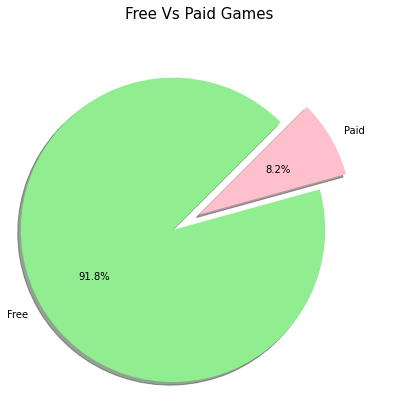

In [59]:
#Top Free games
Top_Free_games= df[df['Primary_Genre']=='Games'].sort_values(by='Reviews', ascending=False).head(15)
#Top Paid Games
Top_Paid_games= df[(df['Primary_Genre']=='Games')&(df['Free']==False)].sort_values(by='Reviews', ascending=False).head(15)
print("No of Free games: \n","177827" ) #df[(df['Free']==True)&(df['Primary_Genre']=='Games')]['Free'].value_counts()
print("No of Paid games: \n", "15919") #df[(df['Free']==False)&(df['Primary_Genre']=='Games')]['Free'].value_counts()
##########
plt.figure(figsize=(7,7))
labels = 'Free', 'Paid'
sizes = [177827, 15919] 
colors = ["lightgreen","pink"]
explode = (0.2,0)
plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, startangle=45)
plt.title('Free Vs Paid Games',size = 15)
plt.show()

In [112]:
#Top Free Apps 
#Top Paid Apps

from plotly import tools
trace12 = go.Bar(
    x=Top_Free_games["App_Name"],
    y=Top_Free_games["Reviews"],
    name='Top Free Games'
)
trace13= go.Bar(
    x=Top_Paid_games["App_Name"],
    y=Top_Paid_games["Reviews"],
    name='Top Paid games'
)
fig11 = tools.make_subplots(rows=1, cols=2)

In [114]:
fig11.append_trace(trace12, 1,1)
fig11.append_trace(trace13, 1,2)
fig11.layout.update(height=560, width=700)
fig11.update_layout(title='Top 10 Games', title_x=0.45)
fig11.show()

> Seems like there are only 8.2% of paid apps present in 19.3 lakh applications.

> Roblox has 6 million users in free apps

> Minecraft is the most selling app and have around 500 thousand users. 

### Q7. What is the growth of gamers over the years. (2008 - 2021)

In [61]:
print('Large sized Games:\n',df.App_Name[(df.Size_MB>=500)&(df.Primary_Genre=='Games')].count())
print('Moderate sized Games:\n',df.App_Name[((df.Size_MB>=150)&(df.Size_MB<=500))&(df.Primary_Genre=='Games')].count())
print('Small sized Games:\n',df.App_Name[(df.Size_MB<=150)&(df.Primary_Genre=='Games')].count())

Large sized Games:
 7051
Moderate sized Games:
 48107
Small sized Games:
 138547


In [62]:
lg_sz=df[(df.Size_MB>=500)&(df.Primary_Genre=='Games')]
md_sz=df[((df.Size_MB>=150)&(df.Size_MB<=500))&(df.Primary_Genre=='Games')]
sl_sz=df[(df.Size_MB<=150)&(df.Primary_Genre=='Games')]
#Large games df
lg_sz_pl_yr= lg_sz.groupby(lg_sz.Released.dt.year)["Reviews"].sum().reset_index()
lg_sz_pl_yr.columns=['Year', 'Players']
#Medium games df
md_sz_pl_yr=md_sz.groupby(md_sz.Released.dt.year)["Reviews"].sum().reset_index()
md_sz_pl_yr.columns=['Year', 'Players']
#Small games df
sl_sz_pl_yr=sl_sz.groupby(sl_sz.Released.dt.year)["Reviews"].sum().reset_index()
sl_sz_pl_yr.columns=['Year', 'Players']

In [91]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=lg_sz_pl_yr['Year'], 
                          y=lg_sz_pl_yr['Players'], 
                          name='Large Game Players (500 MB+)', 
                          opacity=0.5,
                         line = dict(color='blue', width=2)))

fig2.add_trace(go.Scatter(x=md_sz_pl_yr['Year'], 
                          y=md_sz_pl_yr['Players'], 
                          name='Medium Game Players(150 - 500 MB)', 
                          opacity=0.5,
                         line = dict(color='green', width=1)))

fig2.add_trace(go.Scatter(x=sl_sz_pl_yr['Year'], 
                          y=sl_sz_pl_yr['Players'], 
                          name='Small Game Players (Below 150 MB)', 
                          opacity=0.75,
                         line=dict(color='red', width=2)))

fig2.update_layout(title='Gamers over the years (2008 to 2021)',
                   xaxis_title='Year',
                   yaxis_title='Players', title_x=0.4, width= 700)
fig2.show()

> Overall there is an excess number of participants in medium sized games with 32 million gamers. 

> Since the start of small sized games the number of players has gradually increased.

> Gamer rate in 2018 took steep growth despite fewer large games.

>In the year 2020 and 2021 there has been a massive drop in users across all the categories it is possible it might be the effect of COVID-19.

### Q8.Which developer has the highest earnings from paid apps?

In [ ]:
#Paid apps df
paid_apps_df= df[df['Free']==False]
paid_apps_df['Revenue']=round(paid_apps_df['Revenue'],2)
# Rounding up Average_User_Rating for color
paid_apps_df['Average_User_Rating']=round(paid_apps_df['Average_User_Rating'],1)
paid_apps_df.rename(columns = {'Average_User_Rating':'User Rating'}, inplace = True)
#Grouping by Developer
#paid_apps_df.groupby(['Developer'])['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False).head(100)

In [ ]:
fig7 = px.parallel_categories(paid_apps_df.sort_values(by='Revenue',ascending=False).head(30), 
                              dimensions=['Content_Rating','Developer','Revenue','Primary_Genre'],
                              color='User Rating',
                              color_continuous_scale=px.colors.diverging.BrBG,
                              labels={'Content_Rating':'Age+',
                                      'Primary_Genre':'Category',
                                      'Revenue':'Earnings ($)'},
                              title= "Highest Earning Developer")
fig7.update_layout(coloraxis_colorbar_x=-0.1, 
                   title_x=0.5, 
                   margin=dict(r=100))
fig7.show()

In [90]:
figx1 = px.parallel_categories(paid_apps_df.sort_values(by='Revenue',ascending=False).head(30), 
                              dimensions=['Developer','Revenue'],
                            
                              labels={'Content_Rating':'Age+',
                                      'Primary_Genre':'Category',
                                      'Revenue':'Earnings ($)'},
                              title= "Developer Earnings")
figx1.update_layout(coloraxis_colorbar_x=-0.3, 
                   title_x=0.5, 
                   margin=dict(r=100,l=200), width= 700)
figx2 = px.parallel_categories(paid_apps_df.sort_values(by='Revenue',ascending=False).head(30), 
                              dimensions=['Primary_Genre','Developer'],
                              
                              labels={'Content_Rating':'Age+',
                                      'Primary_Genre':'Category',
                                      'Revenue':'Earnings ($)'},
                              title= "Developer Genre")
figx2.update_layout(coloraxis_colorbar_x=-0.3,title_x=0.5, 
                   margin=dict(r=200), width= 700)

figx3 = px.parallel_categories(paid_apps_df.sort_values(by='Revenue',ascending=False).head(30), 
                              dimensions=['Content_Rating','Developer'],
                              color='User Rating',
                              color_continuous_scale=px.colors.diverging.BrBG,
                              labels={'Content_Rating':'Age+',
                                      'Primary_Genre':'Category',
                                      'Revenue':'Earnings ($)'},
                              title= "Developer Content Rating")
figx3.update_layout(coloraxis_colorbar_x=-0.3, 
                   title_x=0.5, 
                   margin=dict(r=200,l=150), width= 700)
figx1.show()
figx3.show()
figx2.show()

> Mojang game developer is the highest earner from paid apps and Minecraft app is the app that brought 3.4M USD

> Second highest is Time Base Technology Limited with one app GoodNotes 5 having 1.5M USD.

> Games an Productivity apps has more earnings compared to other categories.

> Majority of the developers target their apps on Content Rating 4+ i.e to everyone. 

## Summary



The Exploratory Data Analysis on Apple Appstore dataset is completed. Here are the outline's that we have followed:

- Downloaded the dataset from Kaggle
- Processed dirty data by cleaning, modifying to prepare a data frame ready for analysis.
- Once done with data preprocessing started analyzing the data and got a good picture of it.
- Asked and answered few interesting questions.

> The following are the observations have been noticed during Exploratory Analysis:

1. Google LLC, Instagram, Inc., Spotify Ltd., Voodoo, AMZN Mobile LLC, etc. are the top 5 developers with most popularity.

2. The dominant apps from random top developers.
a) Google LLC: Youtube, b) Disney: My Disney Experience, c) Microsoft:Teams, d) Voodoo: Hole.io, e) Amazon: AMZN shopping, f) Lion Studio: Match 3D 

3. Small Apps have more users. No of small sized apps are huge compared to large and medium. Although Medium sized apps are few, but user percentage is good.

4. 2009 to 2012 have is steady growth with 100M users yearly and dropped heavily in 2013 by 30M users. 2013-2020 had ups and downs(mostly downs). In the year 2020 and 2021 there has been a massive drop in users and app releases across all the categories it is possible that might be the effect of COVID-19.

5. Majority of the apps has been added in between IOS 8-12 across all categories. Games started rising from IOS 6 with 23+ thousand apps.

6. Seems like there are only 8.2% of paid apps present in 19.3 lakh applications. Roblox has 6 million users in free apps. Minecraft is the most selling app and have around 500 thousand users.

7. Overall there is an excess number of participants in medium sized games with 32 million gamers.

8. Chownow has published 3699 apps in total.

9. Mojang: Minecraft (3.4M USD), Time Base Technology Limited: GoodNotes 5 (1.5M USD), Piksoft Inc,:TurboScan™ Pro: PDF scanner(1.4M USD), Ginger Labs: Notability(1.3M USD), Shotzoom Software: Golfshot Plus (1.2M USD). Majority of the developers target their apps on Content Rating 4+ i.e to everyone.

 




## Future work

- Interesting analysis can be done by comparing Google playstore and Apple appstore.

- I am planning to do a prediction on success of the app from appstore.

## References

Apple AppStore Dataset : https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps

What is Exploratory Data Analysis : https://en.wikipedia.org/wiki/Exploratory_data_analysis

Pandas Documentation: https://pandas.pydata.org/docs/user_guide/index.html

Properties of update_layout: https://plotly.com/python/reference/layout/

Plotly Gallery: https://plotly.com/python/

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html


## Follow Me

[LinkedIn](https://www.linkedin.com/in/pratulot/)  --  [Medium](https://medium.com/@pratulofficialthings)  --  [GitHub](https://github.com/pratulot)


  >

Saving work on my Jovian profile

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="apple-appstore-eda")
#jovian.commit(files="iphone_models_list.csv")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 